In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scikitplot.metrics import plot_confusion_matrix

In [2]:
#Reading csv file using pandas.read_csv and saved in data variable
data = pd.read_csv("fraud.csv")

In [3]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
3,1,PAYMENT,7817.71,53860.00,46042.29,0.00,0.00,0,0
4,1,PAYMENT,7107.77,183195.00,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
16421,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
16422,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
16423,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
16424,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["type"]=label_encoder.fit_transform(data["type"])
data["type"].unique()

array([3, 2, 1, 4, 0])

In [5]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
3,1,3,7817.71,53860.00,46042.29,0.00,0.00,0,0
4,1,3,7107.77,183195.00,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
16421,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
16422,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
16423,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
16424,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [6]:
independent = data[["step","type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFlaggedFraud"]]
dependent = data[["isFraud"]]

In [7]:
#Creating a model for train set
#from sklearn library call model_selection function and import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent,dependent, test_size = 0.2, random_state = 0)

In [8]:
#Standardization is changing every colume into same range of value
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'splitter':['best','random']} 
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=3)

In [10]:
re=grid.cv_results_
grid_predictions = grid.predict(X_test) 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions) 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)

In [11]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}: 0.9972610684100637


In [12]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[1623    7]
 [   2 1654]]


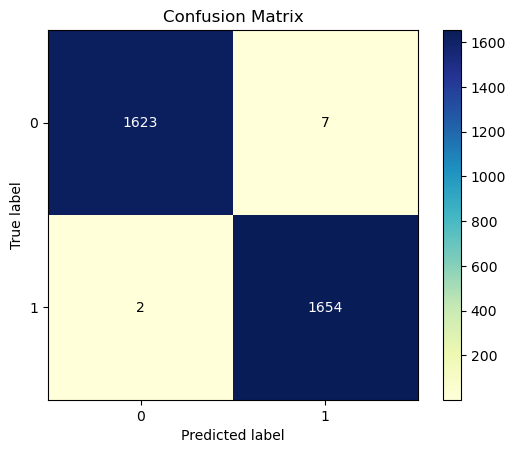

In [13]:
plot_confusion_matrix(y_test, grid_predictions, cmap="YlGnBu")
plt.show()

In [14]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00      1656

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286



In [15]:
table=pd.DataFrame.from_dict(re)

In [16]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021879,7.655512e-03,0.009375,0.007655,gini,auto,best,"{'criterion': 'gini', 'max_features': 'auto', ...",0.996195,0.994292,0.997717,0.995053,0.996575,0.995967,0.001194,4
1,0.015627,2.400344e-06,0.003126,0.006252,gini,auto,random,"{'criterion': 'gini', 'max_features': 'auto', ...",0.992009,0.991629,0.996195,0.994292,0.990867,0.992998,0.001964,9
2,0.021877,7.654558e-03,0.006250,0.007654,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.996956,0.997336,0.996575,0.996956,0.990868,0.995738,0.002447,6
3,0.015628,2.362149e-06,0.006251,0.007655,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.984018,0.990868,0.997717,0.995053,0.993912,0.992314,0.004694,10
4,0.021877,7.656252e-03,0.009375,0.007655,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.996195,0.996575,0.996956,0.998097,0.997336,0.997032,0.000655,3
5,0.015627,9.488940e-07,0.006250,0.007655,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.995053,0.995434,0.992390,0.996195,0.992390,0.994292,0.001596,7
6,0.021877,7.655571e-03,0.012502,0.006251,entropy,auto,best,"{'criterion': 'entropy', 'max_features': 'auto...",0.993531,0.993531,0.995814,0.999239,0.996956,0.995814,0.002166,5
7,0.015628,1.676406e-06,0.006250,0.007655,entropy,auto,random,"{'criterion': 'entropy', 'max_features': 'auto...",0.989345,0.992009,0.995053,0.990107,0.995053,0.992313,0.002399,11
8,0.028127,6.250382e-03,0.003125,0.006250,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.997336,0.996956,0.996195,0.997717,0.998097,0.997260,0.000655,2
9,0.015627,1.775218e-06,0.003125,0.006250,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.990106,0.993912,0.994673,0.993531,0.988965,0.992237,0.002265,12
